<h1><center>Train Image classifier on MNIST with Torchero</h1></center>

## Imports

In [1]:
# Torch #
import torch
from torch import nn

# Torchero #
import torchero
from torchero.models.vision import ImageClassificationModel
from torchero.callbacks import ProgbarLogger as Logger, ModelCheckpoint, CSVLogger
from torchero.utils.data import train_test_split
from torchero.utils.vision import show_imagegrid_dataset, transforms, datasets, download_image
from torchero.meters import ConfusionMatrix

from matplotlib import pyplot as plt

In [2]:
BATCH_SIZE = 300
VAL_BATCH_SIZE = 300
CUDA = True

## Model definition

## Load dataset

In [3]:
train_ds = datasets.MNIST(root='/tmp/data/mnist', download=True, train=True, transform=transforms.Compose([transforms.RandomInvert(),
                                                                                                           transforms.ToTensor()]))
test_ds = datasets.MNIST(root='/tmp/data/mnist', download=False, train=False, transform=transforms.Compose([transforms.ToTensor()]))    

In [4]:
train_ds, val_ds = train_test_split(train_ds)

### Train dataset examples

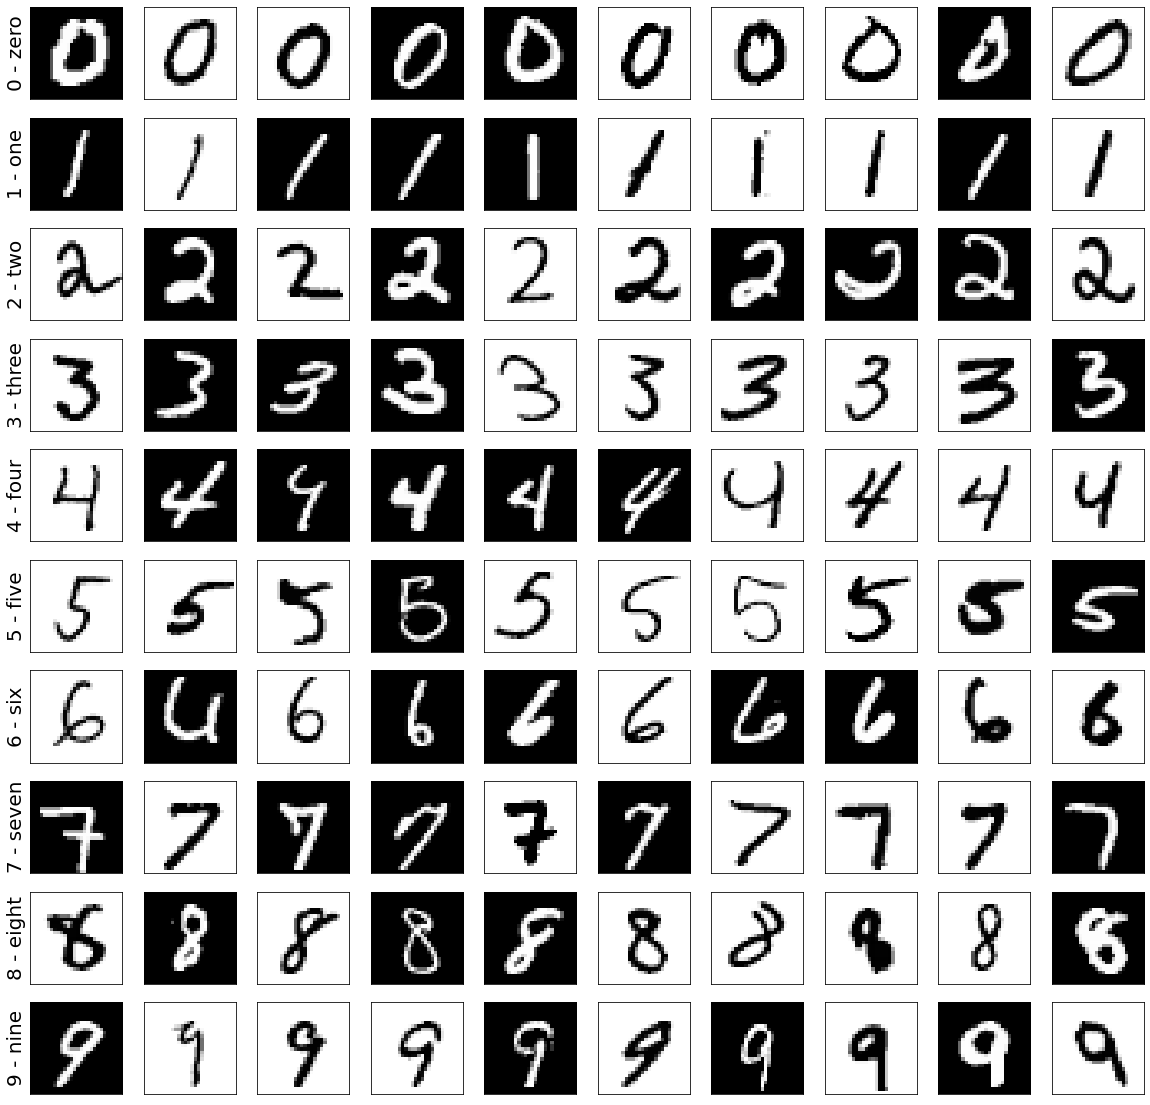

In [5]:
show_imagegrid_dataset(train_ds)
plt.show()

### Test dataset examples

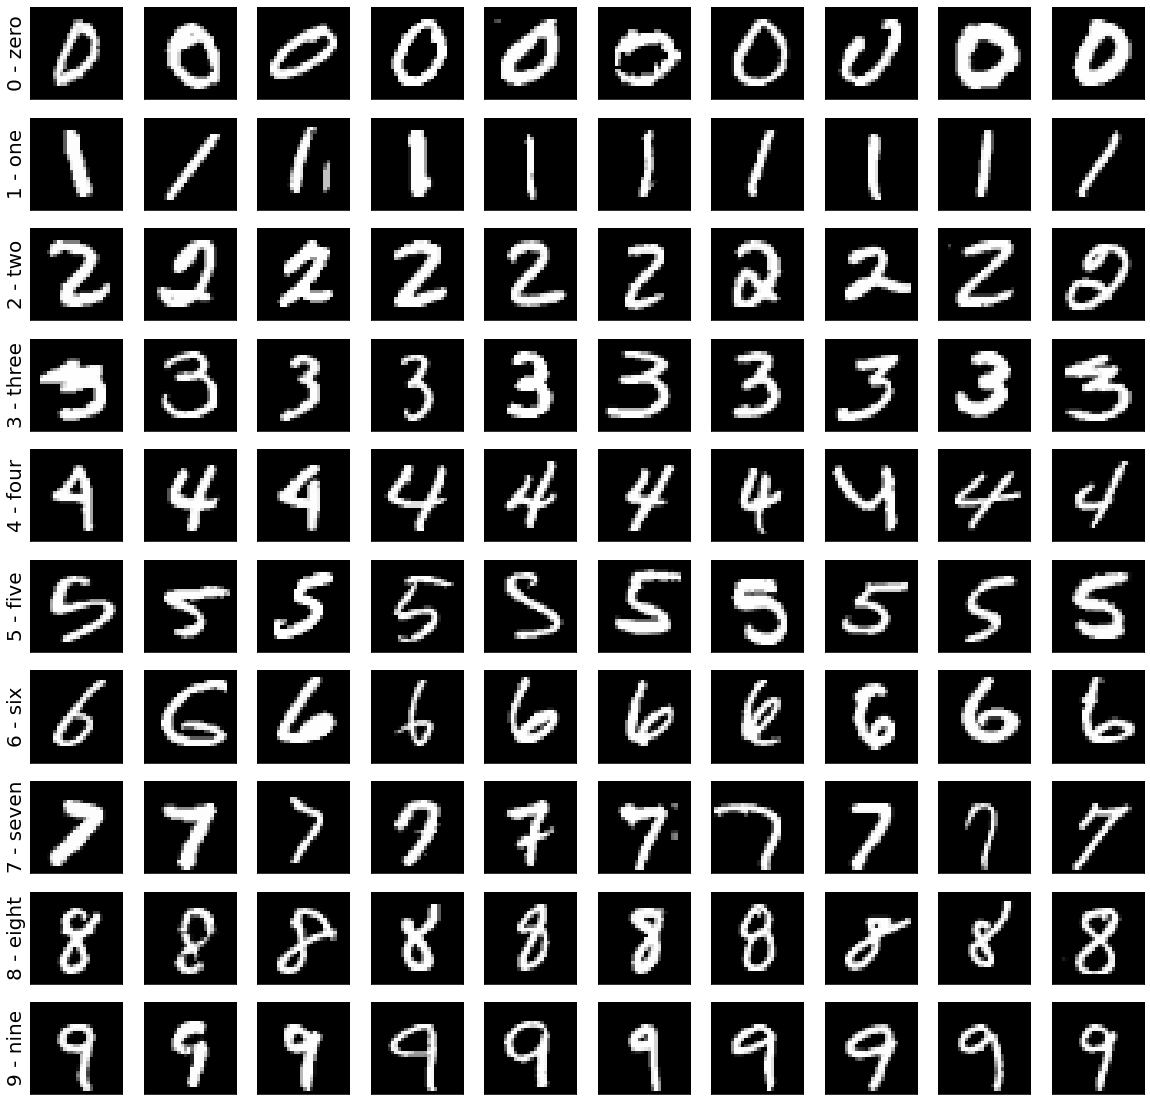

In [6]:
show_imagegrid_dataset(test_ds)
plt.show()

### Network definition

In [7]:
network = nn.Sequential(nn.Conv2d(in_channels=1, out_channels=32, kernel_size=5),
                        nn.ReLU(inplace=True),
                        nn.MaxPool2d(2),
                        nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
                        nn.ReLU(inplace=True),
                        nn.MaxPool2d(2),
                        nn.Flatten(),
                        nn.Linear(5*5*64, 500),
                        nn.ReLU(inplace=True),
                        nn.Linear(500, 10))
network

Sequential(
  (0): Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU(inplace=True)
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Flatten(start_dim=1, end_dim=-1)
  (7): Linear(in_features=1600, out_features=500, bias=True)
  (8): ReLU(inplace=True)
  (9): Linear(in_features=500, out_features=10, bias=True)
)

In [8]:
checkpoint = ModelCheckpoint('saved_model', mode='max', monitor='val_acc')
model = ImageClassificationModel(model=network, 
                                 transform=transforms.Compose([transforms.Grayscale(),
                                                               transforms.Resize((28,28)),
                                                               transforms.ToTensor()]),
                                 classes=[str(i) for i in range(10)])
model.compile(optimizer='adam',
              callbacks=[Logger(notebook=True),
                         checkpoint,
                         CSVLogger('training_results.xml')])

In [9]:
if CUDA:
    model.cuda()

## Train

In [10]:
history = model.fit(train_ds,
                    val_ds,
                    batch_size=1024,
                    epochs=30)

  0%|          | 0/30 [00:00<?, ?epoch/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

/usr/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ../c10/core/TensorImpl.h:1153.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Model saved to 'saved_model'


  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.936 to 0.964


  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.964 to 0.974


  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.974 to 0.976


  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.976 to 0.978


  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.978 to 0.979


  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.979 to 0.984


  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.984 to 0.985


  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.985 to 0.985


  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.985 to 0.986


  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.986 to 0.988


  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.988 to 0.988


  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.988 to 0.990


  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

Model saved to 'saved_model': val_acc improved from 0.990 to 0.990


  0%|          | 0/47 [00:00<?, ? batchs/s]

  0%|          | 0/47 [00:00<?, ? batchs/s]

### Training results

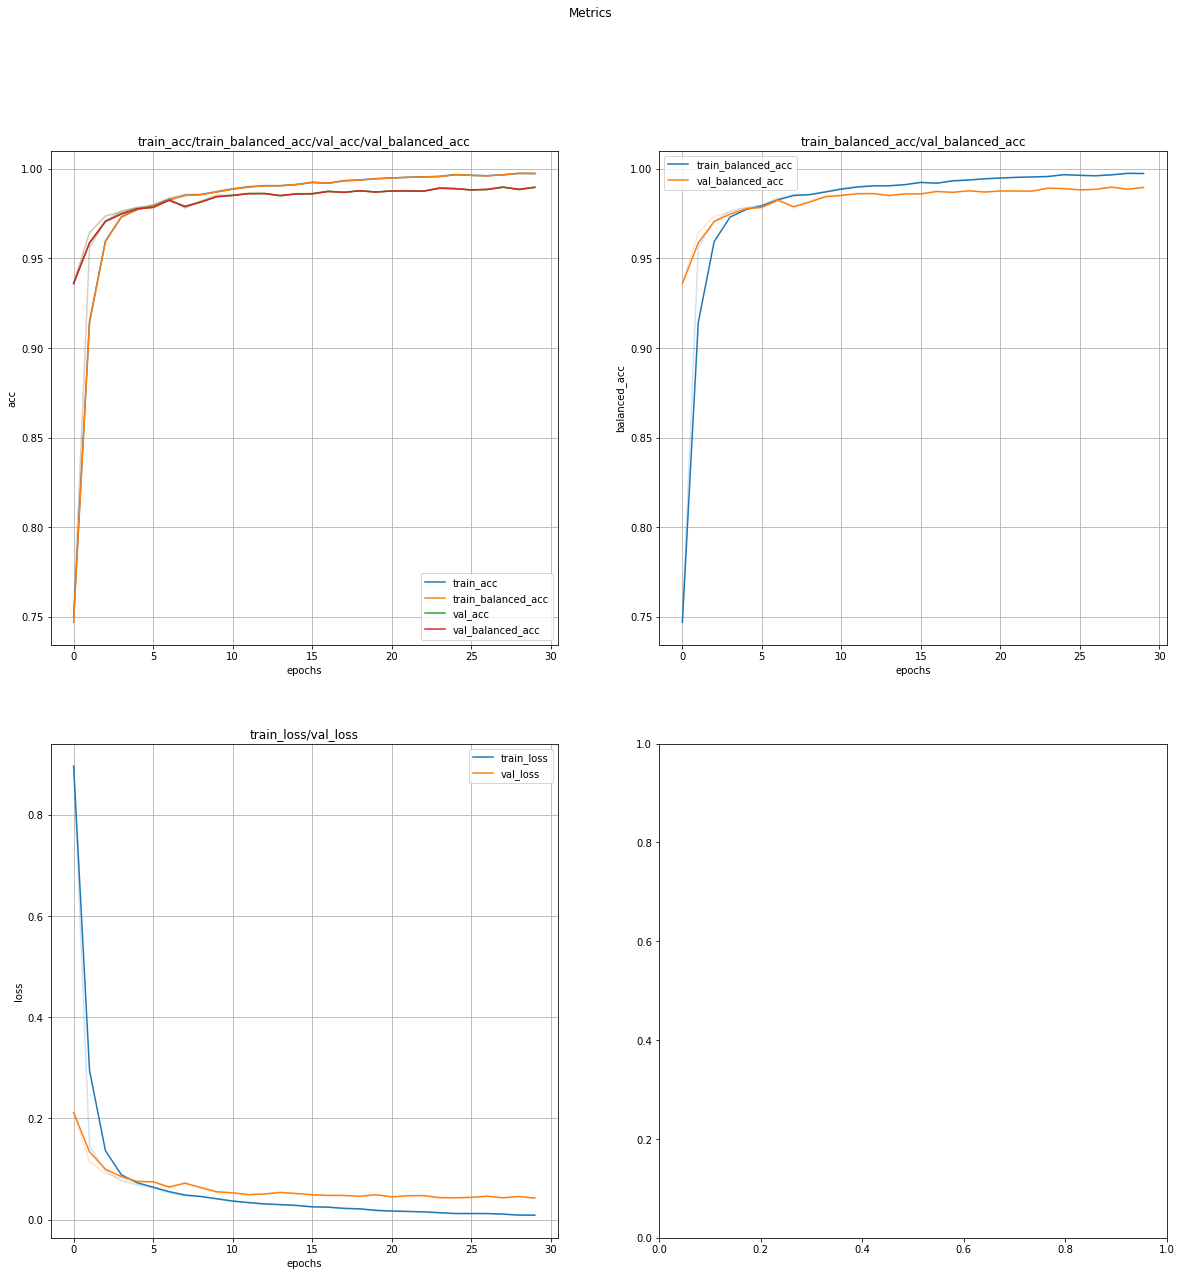

In [11]:
history.plot(figsize=(20, 20), smooth=0.2)
plt.show()

### Load the best checkpoint

In [12]:
checkpoint.load()

/home/chino/Proyectos/Machine Learning/torchero/examples/notebooks/torchero/callbacks/checkpoint.py:73: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f)


{'epoch': 28, 'val_acc': 0.9900833368301392}

## Evaluate the model on test set

In [13]:
results = model.evaluate(test_ds, metrics=['categorical_accuracy', 'balanced_accuracy', ConfusionMatrix()])

### Accuracy

In [14]:
for metric in ['acc', 'balanced_acc']:
    print("{}: {:.3f}%".format(metric, results[metric] * 100))

acc: 99.040%
balanced_acc: 99.032%


### Confusion Matrix

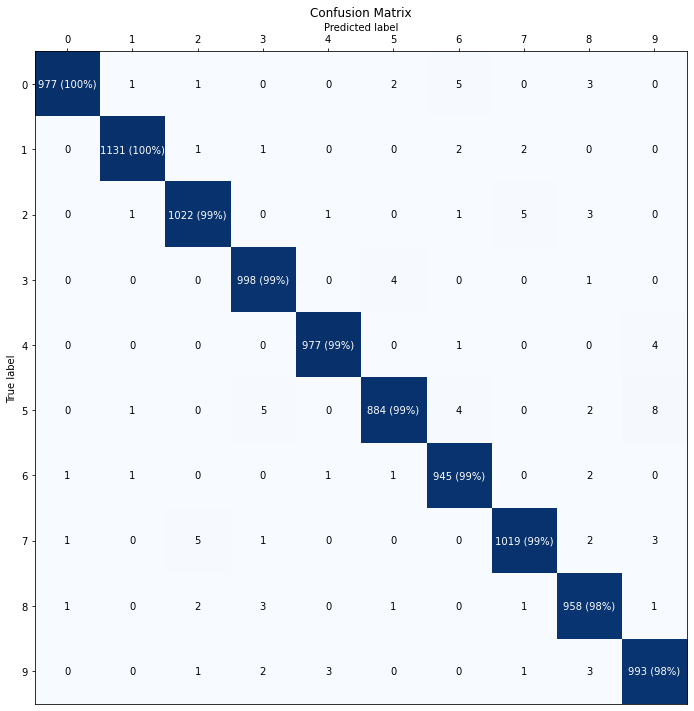

In [15]:
fig, ax = plt.subplots(figsize=(12,12))
results['confusion_matrix'].plot(fig=fig, ax=ax, classes=model.classes)

#### Most common model confusions

In [16]:
_, indices = results['confusion_matrix'].matrix.topk(k=3)
{i: indices[i].tolist() for i in range(10)}

{0: [0, 6, 8],
 1: [1, 7, 6],
 2: [2, 7, 8],
 3: [3, 5, 8],
 4: [4, 9, 6],
 5: [5, 9, 3],
 6: [6, 8, 1],
 7: [7, 2, 9],
 8: [8, 3, 2],
 9: [9, 4, 8]}

## Predict on external images

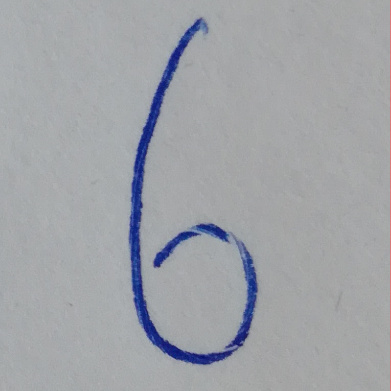

In [17]:
im = download_image('https://i.stack.imgur.com/CF1ze.jpg').convert('RGB')
im

In [18]:
model.predict(im).topk(2)

/home/chino/Proyectos/Machine Learning/torchero/examples/notebooks/torchero/models/model.py:614: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  preds = nn.functional.softmax(preds)


[('6', 0.23766280710697174), ('5', 0.18380962312221527)]